<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

Aluna: Maria Luiza Cordeiro

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados** 

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [1]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

fonte = BeautifulSoup(open('estados-bruto.xml', mode='r'), 'xml')

In [2]:
# visualize os resultados

fonte

<?xml version="1.0" encoding="utf-8"?>
<ESTADOS>
<ESTADO>
<ID>1</ID>
<NOME>ACRE</NOME>
<IDCAPITAL>16</IDCAPITAL>
<SIGLA>AC</SIGLA>
<REGIAO>NORTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>2</ID>
<NOME>ALAGOAS</NOME>
<IDCAPITAL>68</IDCAPITAL>
<SIGLA>AL</SIGLA>
<REGIAO>NORDESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>3</ID>
<NOME>AMAPA</NOME>
<IDCAPITAL>131</IDCAPITAL>
<SIGLA>AP</SIGLA>
<REGIAO>NORTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>4</ID>
<NOME>AMAZONAS</NOME>
<IDCAPITAL>178</IDCAPITAL>
<SIGLA>AM</SIGLA>
<REGIAO>NORTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>5</ID>
<NOME>BAHIA</NOME>
<IDCAPITAL>536</IDCAPITAL>
<SIGLA>BA</SIGLA>
<REGIAO>NORDESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>6</ID>
<NOME>CEARA</NOME>
<IDCAPITAL>676</IDCAPITAL>
<SIGLA>CE</SIGLA>
<REGIAO>NORDESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>7</ID>
<NOME>DISTRITO FEDERAL</NOME>
<IDCAPITAL>916</IDCAPITAL>
<SIGLA>DF</SIGLA>
<REGIAO>CENTRO-OESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>8</ID>
<NOME>ESPIRITO SANTO</NOME>
<IDCAPITAL>879</IDCAPITAL>
<SIGLA>ES</SIGLA>
<REGIAO>SU

In [3]:
# manipule os dados

estados = []

for linha in fonte.find_all('ESTADO'):
  id = linha.find('ID').get_text()
  nome = linha.find('NOME').get_text()
  id_capital = linha.find('IDCAPITAL').get_text()
  sigla = linha.find('SIGLA').get_text()
  regiao = linha.find('REGIAO').get_text()

  estados.append([nome, sigla, regiao])

print(estados)

[['ACRE', 'AC', 'NORTE'], ['ALAGOAS', 'AL', 'NORDESTE'], ['AMAPA', 'AP', 'NORTE'], ['AMAZONAS', 'AM', 'NORTE'], ['BAHIA', 'BA', 'NORDESTE'], ['CEARA', 'CE', 'NORDESTE'], ['DISTRITO FEDERAL', 'DF', 'CENTRO-OESTE'], ['ESPIRITO SANTO', 'ES', 'SUDESTE'], ['GOIAS', 'GO', 'CENTRO-OESTE'], ['MARANHAO', 'MA', 'NORDESTE'], ['MATO GROSSO', 'MT', 'CENTRO-OESTE'], ['MATO GROSSO DO SUL', 'MS', 'CENTRO-OESTE'], ['PARA', 'PA', 'NORTE'], ['PARAIBA', 'PB', 'NORDESTE'], ['PARANA', 'PR', 'SUL'], ['PERNAMBUCO', 'PE', 'NORDESTE'], ['PIAUI', 'PI', 'NORDESTE'], ['RIO DE JANEIRO', 'RJ', 'SUDESTE'], ['RIO GRANDE DO NORTE', 'RN', 'NORDESTE'], ['RIO GRANDE DO SUL', 'RS', 'SUL'], ['RONDONIA', 'RO', 'NORTE'], ['RORAIMA', 'RR', 'NORTE'], ['SANTA CATARINA', 'SC', 'SUL'], ['SAO PAULO', 'SP', 'SUDESTE'], ['SERGIPE', 'SE', 'NORDESTE'], ['TOCANTINS', 'TO', 'NORTE'], ['MINAS GERAIS', 'MG', 'SUDESTE']]


In [4]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;

import csv

header = ['estado', 'sigla', 'regiao']

with open(file='./estados-limpo.csv', mode='w', encoding='utf8') as arquivo:
  escritor_csv = csv.writer(arquivo, delimiter=';')
  escritor_csv.writerow(header)
  escritor_csv.writerows(estados)

In [5]:
with open(file='./estados-limpo_virgula.csv', mode='w', encoding='utf8') as arquivo:
  escritor_csv = csv.writer(arquivo, delimiter=',')
  escritor_csv.writerow(header)
  escritor_csv.writerows(estados)

### **1.2. Cidades** 

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [6]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

fonte_df = pd.read_csv('cidades-bruto.csv', sep=';')

In [7]:
# visualize os resultados

fonte_df

,"FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom"
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258...
...,...
1107,vw_pib_percapita.fid-4514e25a_17aaa325034_-20d...
1108,vw_pib_percapita.fid-4514e25a_17aaa325034_-20d...
1109,vw_pib_percapita.fid-4514e25a_17aaa325034_-20d...
1110,vw_pib_percapita.fid-4514e25a_17aaa325034_-20d...


In [8]:
# Nesse exercício, eu criei uma tabela usando o Databricks, depois eu fiz o download dela e estou colocando ela aqui para uma melhor visualização do dataframe
# URL com o arquivo = https://drive.google.com/file/d/1ZI-4d-rhc8BQgYfX99HLV3uvg6RvA_YQ/view?usp=sharing

import pandas as pd

fonte_df = pd.read_csv('cidades_bruto.csv', sep=',')

fonte_df

,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...
...,...,...,...,...,...,...,...,...,...,...,...,...
1107,vw_pib_percapita.fid-4514e25a_17aaa325034_-20df,2513,PARAÍBA,Sossêgo,2010.0,1.280403e+04,3089,4145.040039,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-36.106045611711714 -6.6676813...
1108,vw_pib_percapita.fid-4514e25a_17aaa325034_-20de,175,BAHIA,Serra Dourada,2010.0,7.385712e+04,17858,4135.799805,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-43.58562217982267 -12.9247578...
1109,vw_pib_percapita.fid-4514e25a_17aaa325034_-20dd,3104,MINAS GERAIS,Cantagalo,2010.0,2.084534e+04,4132,5044.850098,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-42.61155604110818 -18.4592039...
1110,vw_pib_percapita.fid-4514e25a_17aaa325034_-20dc,633,RIO GRANDE DO SUL,Tiradentes do Sul,2010.0,6.366322e+04,6991,9106.450195,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-54.112368230486354 -27.303851...


In [9]:
# manipule os dados

cidades_limpo_df = fonte_df[fonte_df['Censo'] == 2010][['UF', 'nome', 'PIB', 'Pop_est_2009', 'PIB_percapita']]

cidades_limpo_df

,UF,nome,PIB,Pop_est_2009,PIB_percapita
0,BAHIA,Tremedal,5.788399e+04,18433,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4.572388e+04,4000,11430.969727
2,ESPIRITO SANTO,Vitória,1.978263e+07,320156,61790.589844
3,MINAS GERAIS,Jacutinga,2.478160e+05,21424,11567.209961
4,PIAUÍ,Nazária,2.095138e+04,7895,2653.750000
...,...,...,...,...,...
1107,PARAÍBA,Sossêgo,1.280403e+04,3089,4145.040039
1108,BAHIA,Serra Dourada,7.385712e+04,17858,4135.799805
1109,MINAS GERAIS,Cantagalo,2.084534e+04,4132,5044.850098
1110,RIO GRANDE DO SUL,Tiradentes do Sul,6.366322e+04,6991,9106.450195


In [10]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

with open(file='./cidades-limpo.csv', mode='w', encoding='utf8') as arquivo:
  escritor_csv = csv.writer(arquivo, delimiter=';')
  cidades_limpo_df.to_csv('cidades-limpo.csv', index=False)

### **1.3. Brasil** 

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-bruto.csv` com os dados do arquivo `cidades-bruto.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [11]:
# solução do exercício 1.3

estados_df = pd.read_csv('estados-limpo.csv', sep=';')
cidades_df = pd.read_csv('cidades-limpo.csv', sep=',')

In [12]:
estados_df

,estado,sigla,regiao
0,ACRE,AC,NORTE
1,ALAGOAS,AL,NORDESTE
2,AMAPA,AP,NORTE
3,AMAZONAS,AM,NORTE
4,BAHIA,BA,NORDESTE
5,CEARA,CE,NORDESTE
6,DISTRITO FEDERAL,DF,CENTRO-OESTE
7,ESPIRITO SANTO,ES,SUDESTE
8,GOIAS,GO,CENTRO-OESTE
9,MARANHAO,MA,NORDESTE


In [13]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 5.7 MB/s eta 0:00:00


In [14]:
from unidecode import unidecode

def remover_acentos(texto):
    if isinstance(texto, str):
        return unidecode(texto)
    else:
        return texto

cidades_df = cidades_df.applymap(remover_acentos)

cidades_df

,UF,nome,PIB,Pop_est_2009,PIB_percapita
0,BAHIA,Tremedal,5.788399e+04,18433,3140.239990
1,RIO GRANDE DO SUL,Turucu,4.572388e+04,4000,11430.969727
2,ESPIRITO SANTO,Vitoria,1.978263e+07,320156,61790.589844
3,MINAS GERAIS,Jacutinga,2.478160e+05,21424,11567.209961
4,PIAUI,Nazaria,2.095138e+04,7895,2653.750000
...,...,...,...,...,...
1105,PARAIBA,Sossego,1.280403e+04,3089,4145.040039
1106,BAHIA,Serra Dourada,7.385712e+04,17858,4135.799805
1107,MINAS GERAIS,Cantagalo,2.084534e+04,4132,5044.850098
1108,RIO GRANDE DO SUL,Tiradentes do Sul,6.366322e+04,6991,9106.450195


In [15]:
estados_cidades_df = pd.merge(left=estados_df, right=cidades_df, left_on='estado', right_on='UF')

estados_cidades_df

,estado,sigla,regiao,UF,nome,PIB,Pop_est_2009,PIB_percapita
0,ACRE,AC,NORTE,ACRE,Marechal Thaumaturgo,109181.867188,14275,7648.470215
1,ACRE,AC,NORTE,ACRE,Senador Guiomard,217153.859375,19697,11024.719727
2,ACRE,AC,NORTE,ACRE,Assis Brasil,48347.300781,5662,8538.910156
3,ACRE,AC,NORTE,ACRE,Epitaciolandia,129641.093750,14224,9114.250000
4,ACRE,AC,NORTE,ACRE,Manoel Urbano,61478.730469,7505,8191.700195
...,...,...,...,...,...,...,...,...
1105,MINAS GERAIS,MG,SUDESTE,MINAS GERAIS,Sao Joao do Paraiso,97728.765625,22782,4289.740234
1106,MINAS GERAIS,MG,SUDESTE,MINAS GERAIS,Delfinopolis,101209.515625,6954,14554.139648
1107,MINAS GERAIS,MG,SUDESTE,MINAS GERAIS,Fruta de Leite,28000.193359,6426,4357.330078
1108,MINAS GERAIS,MG,SUDESTE,MINAS GERAIS,Iturama,561480.750000,33231,16896.289062


In [16]:
estados_cidades_df = estados_cidades_df[['estado', 'sigla', 'regiao', 'nome', 'PIB', 'Pop_est_2009', 'PIB_percapita']]

estados_cidades_df

,estado,sigla,regiao,nome,PIB,Pop_est_2009,PIB_percapita
0,ACRE,AC,NORTE,Marechal Thaumaturgo,109181.867188,14275,7648.470215
1,ACRE,AC,NORTE,Senador Guiomard,217153.859375,19697,11024.719727
2,ACRE,AC,NORTE,Assis Brasil,48347.300781,5662,8538.910156
3,ACRE,AC,NORTE,Epitaciolandia,129641.093750,14224,9114.250000
4,ACRE,AC,NORTE,Manoel Urbano,61478.730469,7505,8191.700195
...,...,...,...,...,...,...,...
1105,MINAS GERAIS,MG,SUDESTE,Sao Joao do Paraiso,97728.765625,22782,4289.740234
1106,MINAS GERAIS,MG,SUDESTE,Delfinopolis,101209.515625,6954,14554.139648
1107,MINAS GERAIS,MG,SUDESTE,Fruta de Leite,28000.193359,6426,4357.330078
1108,MINAS GERAIS,MG,SUDESTE,Iturama,561480.750000,33231,16896.289062


In [17]:
estados_cidades_df.rename(columns={'nome': 'cidade'}, inplace=True)

<ipython-input-17-89908761fe50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estados_cidades_df.rename(columns={'nome': 'cidade'}, inplace=True)


In [18]:
estados_cidades_df

,estado,sigla,regiao,cidade,PIB,Pop_est_2009,PIB_percapita
0,ACRE,AC,NORTE,Marechal Thaumaturgo,109181.867188,14275,7648.470215
1,ACRE,AC,NORTE,Senador Guiomard,217153.859375,19697,11024.719727
2,ACRE,AC,NORTE,Assis Brasil,48347.300781,5662,8538.910156
3,ACRE,AC,NORTE,Epitaciolandia,129641.093750,14224,9114.250000
4,ACRE,AC,NORTE,Manoel Urbano,61478.730469,7505,8191.700195
...,...,...,...,...,...,...,...
1105,MINAS GERAIS,MG,SUDESTE,Sao Joao do Paraiso,97728.765625,22782,4289.740234
1106,MINAS GERAIS,MG,SUDESTE,Delfinopolis,101209.515625,6954,14554.139648
1107,MINAS GERAIS,MG,SUDESTE,Fruta de Leite,28000.193359,6426,4357.330078
1108,MINAS GERAIS,MG,SUDESTE,Iturama,561480.750000,33231,16896.289062


In [19]:
with open(file='./brasil.csv', mode='w', encoding='utf8'):
  estados_cidades_df.to_csv('brasil.csv', index=False)

---

## 2\. Data Analytics

### **2.1. DataFrame** 

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [20]:
# solução do exercício 2.1

brasil_df = pd.read_csv('brasil.csv')

brasil_df

,estado,sigla,regiao,cidade,PIB,Pop_est_2009,PIB_percapita
0,ACRE,AC,NORTE,Marechal Thaumaturgo,109181.867188,14275,7648.470215
1,ACRE,AC,NORTE,Senador Guiomard,217153.859375,19697,11024.719727
2,ACRE,AC,NORTE,Assis Brasil,48347.300781,5662,8538.910156
3,ACRE,AC,NORTE,Epitaciolandia,129641.093750,14224,9114.250000
4,ACRE,AC,NORTE,Manoel Urbano,61478.730469,7505,8191.700195
...,...,...,...,...,...,...,...
1105,MINAS GERAIS,MG,SUDESTE,Sao Joao do Paraiso,97728.765625,22782,4289.740234
1106,MINAS GERAIS,MG,SUDESTE,Delfinopolis,101209.515625,6954,14554.139648
1107,MINAS GERAIS,MG,SUDESTE,Fruta de Leite,28000.193359,6426,4357.330078
1108,MINAS GERAIS,MG,SUDESTE,Iturama,561480.750000,33231,16896.289062


### **2.2. Analise** 

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [21]:
# código para responder a pergunta

cidades_populosas_df = brasil_df.sort_values('Pop_est_2009', ascending=False).head(n=10)

cidades_populosas_df

,estado,sigla,regiao,cidade,PIB,Pop_est_2009,PIB_percapita
583,RIO DE JANEIRO,RJ,SUDESTE,Rio de Janeiro,175739344.0,6186710,28405.949219
83,BAHIA,BA,NORDESTE,Salvador,32824228.0,2998056,10948.500000
34,AMAZONAS,AM,NORTE,Manaus,40486108.0,1738641,23286.060547
697,RIO GRANDE DO SUL,RS,SUL,Porto Alegre,37787912.0,1436123,26312.449219
232,GOIAS,GO,CENTRO-OESTE,Goiania,21386530.0,1281975,16682.490234
871,SAO PAULO,SP,SUDESTE,Sao Bernardo do Campo,28935768.0,810979,35680.050781
504,PIAUI,PI,NORDESTE,Teresina,8700461.0,802537,10841.200195
877,SAO PAULO,SP,SUDESTE,Santo Andre,14709603.0,673396,21843.910156
63,BAHIA,BA,NORDESTE,Feira de Santana,6358135.5,591707,10745.410156
815,SAO PAULO,SP,SUDESTE,Ribeirao Preto,14688064.0,563107,26083.970703


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [22]:
# código para responder a pergunta

menor_pib_nordeste_df = brasil_df[brasil_df['regiao'] == 'NORDESTE'].sort_values('PIB', ascending=True).head(n=5)

menor_pib_nordeste_df

,estado,sigla,regiao,cidade,PIB,Pop_est_2009,PIB_percapita
556,PIAUI,PI,NORDESTE,Sao Miguel da Baixa Grande,7714.598145,2153,3583.189941
507,PIAUI,PI,NORDESTE,Aroeiras do Itaim,8614.797852,2759,3122.429932
589,RIO GRANDE DO NORTE,RN,NORDESTE,Vicosa,8834.245117,1856,4759.830078
522,PIAUI,PI,NORDESTE,Lagoinha do Piaui,9008.676758,2676,3366.469971
363,PARAIBA,PB,NORDESTE,Riacho de Santo Antonio,9611.009766,1588,6052.270020


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [23]:
# código para responder a pergunta

maior_pib_sp_df = brasil_df[brasil_df['estado'] == 'SAO PAULO'].sort_values('PIB', ascending=False).head(n=15)

maior_pib_sp_df

,estado,sigla,regiao,cidade,PIB,Pop_est_2009,PIB_percapita
871,SAO PAULO,SP,SUDESTE,Sao Bernardo do Campo,28935768.00,810979,35680.050781
829,SAO PAULO,SP,SUDESTE,Santos,22546134.00,417098,54054.761719
877,SAO PAULO,SP,SUDESTE,Santo Andre,14709603.00,673396,21843.910156
815,SAO PAULO,SP,SUDESTE,Ribeirao Preto,14688064.00,563107,26083.970703
884,SAO PAULO,SP,SUDESTE,Sao Jose do Rio Preto,7879047.50,419632,18776.089844
808,SAO PAULO,SP,SUDESTE,Maua,6574846.50,417458,15749.719727
850,SAO PAULO,SP,SUDESTE,Limeira,5752286.00,281583,20428.380859
881,SAO PAULO,SP,SUDESTE,Matao,5187325.00,78222,66315.421875
825,SAO PAULO,SP,SUDESTE,Hortolandia,4855737.50,205856,23588.029297
852,SAO PAULO,SP,SUDESTE,Rio Claro,4522812.50,191886,23570.310547


 - Qual é o PIB do estado de Santa Catarina?

In [24]:
# código para responder a pergunta

pib_sc_df = brasil_df[brasil_df['estado'] == 'SANTA CATARINA']['PIB'].agg('sum')

pib_sc_df

17377487.55468749

 - Qual é o população da região sul?

In [25]:
# código para responder a pergunta

populacao_sul_df = brasil_df[brasil_df['regiao'] == 'SUL']['Pop_est_2009'].agg('sum')

populacao_sul_df

5993920

 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [26]:
# código para responder a pergunta

pibcapita_ms_df = brasil_df[brasil_df['estado'] == 'MATO GROSSO DO SUL']['PIB_percapita'].agg('mean')

pibcapita_ms_df

15513.167399088334

 - Qual é a população do Brasil?

In [27]:
# código para responder a pergunta

populacao_brasil_df = brasil_df['Pop_est_2009'].agg('sum')

populacao_brasil_df

46379489

### **2.3. Visualização** 

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

In [28]:
menos_populosas_df = brasil_df.sort_values('Pop_est_2009', ascending=True).head(n=10)

menos_populosas_df

,estado,sigla,regiao,cidade,PIB,Pop_est_2009,PIB_percapita
905,TOCANTINS,TO,NORTE,Oliveira de Fatima,11591.949219,1129,10267.450195
947,MINAS GERAIS,MG,SUDESTE,Cedro do Abaete,10221.856445,1221,8371.709961
939,TOCANTINS,TO,NORTE,Chapada de Areia,11322.538086,1273,8894.370117
916,TOCANTINS,TO,NORTE,Crixas do Tocantins,20361.164062,1289,15796.089844
617,RIO GRANDE DO SUL,RS,SUL,Engenho Velho,24098.886719,1467,16427.330078
363,PARAIBA,PB,NORDESTE,Riacho de Santo Antonio,9611.009766,1588,6052.270020
817,SAO PAULO,SP,SUDESTE,Vitoria Brasil,17446.894531,1662,10497.530273
640,RIO GRANDE DO SUL,RS,SUL,Carlos Gomes,20166.669922,1718,11738.459961
846,SAO PAULO,SP,SUDESTE,Santa Cruz da Esperanca,31603.691406,1733,18236.410156
909,TOCANTINS,TO,NORTE,Sucupira,29328.917969,1741,16846.019531


Text(0.5, 1.0, '10 Cidades Menos Populosas do Brasil')

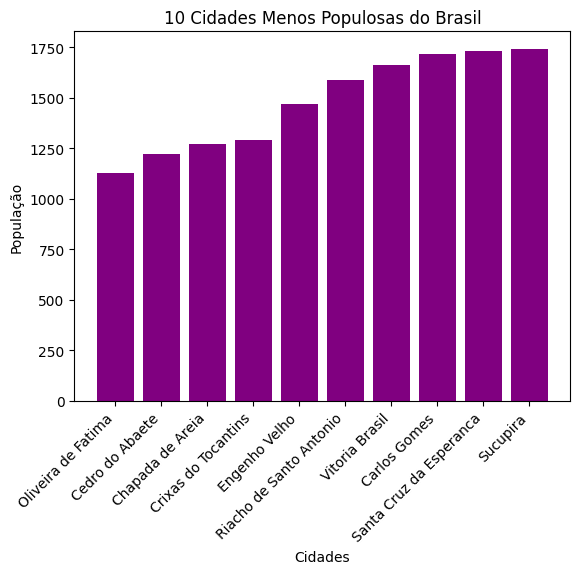

In [29]:
# código para gerar a visualização

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(menos_populosas_df['cidade'], menos_populosas_df['Pop_est_2009'], color='purple')

plt.xticks(rotation=45, ha='right')

ax.set_xlabel('Cidades')
ax.set_ylabel('População')
ax.set_title('10 Cidades Menos Populosas do Brasil')

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

In [30]:
regiao_df = brasil_df[['regiao', 'Pop_est_2009']].groupby('regiao').agg('sum')

regiao_df

,Pop_est_2009
regiao,
CENTRO-OESTE,3685189
NORDESTE,12715409
NORTE,4245152
SUDESTE,19739819
SUL,5993920


Text(0.5, 1.0, 'Proporção da População do Brasil por Região')

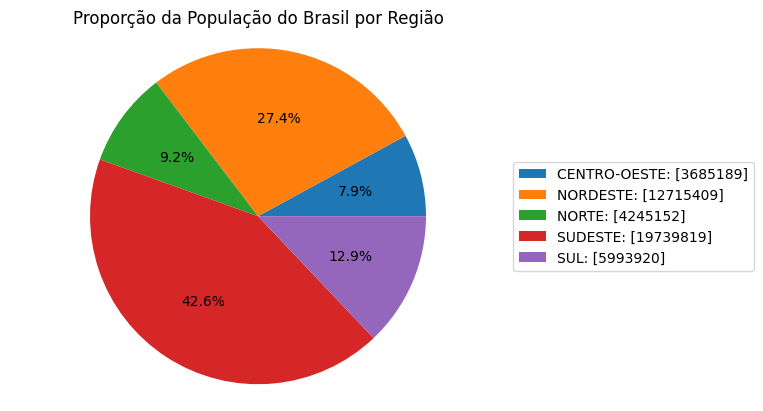

In [31]:
# código para gerar a visualização

plt.pie(regiao_df['Pop_est_2009'], autopct='%1.1f%%')
plt.axis('equal')

legenda = ['{}: {}'.format(regiao, valor) for regiao, valor in zip(regiao_df.index, regiao_df.values)]
plt.legend(legenda, loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Proporção da População do Brasil por Região')